In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df1 = pd.read_excel('../data/img_quant.xlsm', header=None)

In [3]:
df1['Time'] = df1[0].str[:-2]
df1['Side'] = df1[0].map(lambda x: 'Ipsi' if 'i' in x else 'Contra')
df1.dropna(inplace=True)
df1['Percent'] = df1[1] * 100

In [4]:
df1.to_excel('/Users/pax/Library/CloudStorage/OneDrive-KarolinskaInstitutet/Manu_tab/Supplementary_Tablen.xlsx')

In [5]:
df1['Time'] = df1['Time'].astype('category').cat.reorder_categories(['D0', 'D1', 'D7', 'D14', 'D28'])

In [6]:
df1_ipsi = df1[df1['Side'] == 'Ipsi'].copy()
for d in df1_ipsi['Time'].cat.categories[1:]:
    a = df1_ipsi[(df1_ipsi['Time'] == 'D0')]['Percent']
    b = df1_ipsi[(df1_ipsi['Time'] == d)]['Percent']
    # var = stats.levene(a, b)
    res = stats.mannwhitneyu(a, b, alternative='less')
    print(f'{d}: {res[1]}')

D1: 0.8766233766233766
D7: 0.046536796536796536
D14: 0.025974025974025976
D28: 0.012987012987012988


/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_96382/62089661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time', y='Percent', data=df1[df1.Side == 'Ipsi'], ax=ax,
/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_96382/62089661.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_96382/62089661.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


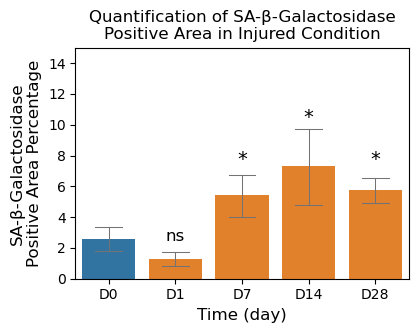

In [8]:
fig, ax = plt.subplots(figsize=(4.3,3))
sns.barplot(x='Time', y='Percent', data=df1[df1.Side == 'Ipsi'], ax=ax,
            errorbar=("ci", 68), capsize=.4,
            err_kws={"color": "0.45", "linewidth": 0.75}, palette=['tab:blue']+['tab:orange']*4)

plt.text(1, 2.75, 'ns', ha='center', va='center', fontsize=12)

plt.text(2, 7.75, '*', ha='center', va='center', fontsize=14)

plt.text(3, 10.5, '*', ha='center', va='center', fontsize=14)

plt.text(4, 7.75, '*', ha='center', va='center', fontsize=14)

ax.set_ylim(0,15)
ax.set_xlabel('Time (day)', fontsize=12)
ax.set_ylabel('SA-β-Galactosidase\nPositive Area Percentage', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.set_title('Quantification of SA-β-Galactosidase\nPositive Area in Injured Condition', fontsize=12)
fig.savefig('/Users/pax/Manu_fig/img_quant_ipsi_ontop.pdf', dpi=300, bbox_inches='tight')

/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_83278/1740371542.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_83278/1740371542.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


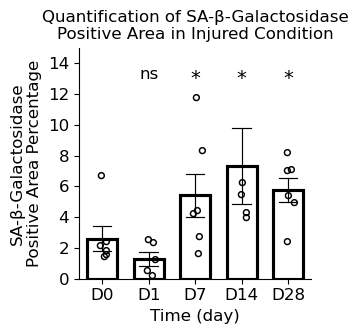

In [29]:
fig, ax = plt.subplots(figsize=(3,3))
sns.barplot(x='Time', y='Percent', data=df1[df1.Side == 'Ipsi'], ax=ax,
            errorbar=("ci", 68), capsize=.4,
            err_kws={"color": "k", "linewidth": 0.85},
            fill=False,
            color='k',
            width=0.65
            # palette=['#c6c6c6']+['#686868']*4
            )
sns.stripplot(x='Time', y='Percent', data=df1[df1.Side == 'Ipsi'], ax=ax, color='k', size=8, marker='$\circ$')

plt.text(1, 13.25, 'ns', ha='center', va='center', fontsize=12)

plt.text(2, 13, '*', ha='center', va='center', fontsize=14)

plt.text(3, 13, '*', ha='center', va='center', fontsize=14)

plt.text(4, 13, '*', ha='center', va='center', fontsize=14)

ax.set_ylim(0,15)
ax.set_xlabel('Time (day)', fontsize=12)
ax.set_ylabel('SA-β-Galactosidase\nPositive Area Percentage', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Quantification of SA-β-Galactosidase\nPositive Area in Injured Condition', fontsize=12)
fig.savefig('/Users/pax/Library/CloudStorage/OneDrive-KarolinskaInstitutet/Manu_fig/img_quant.pdf', bbox_inches='tight')

In [11]:
df_treat = pd.read_excel('../data/IMG_treatment.xlsx', sheet_name='perc')

In [13]:
df_treat['Conditions'] = df_treat['Conditions'].astype('category').cat.reorder_categories(['10%DMSO', 'ABT263', 'Venetoclax', 'Protac Bcl2', 'Protac Bcl-xl'])

In [17]:
for d in df_treat['Conditions'].cat.categories[1:]:
    a = df_treat[(df_treat['Conditions'] == '10%DMSO')]['value']
    b = df_treat[(df_treat['Conditions'] == d)]['value']
    res = stats.ttest_ind(a, b, alternative='greater', permutations=10000)
    print(f'{d}: p-val {res[1]}; skewness {stats.skew(b)}')

ABT263: p-val 0.011904761904761904; skewness -0.47681571086034347
Venetoclax: p-val 0.19047619047619047; skewness -0.6385309919668073
Protac Bcl2: p-val 0.02857142857142857; skewness -0.42666507573725865
Protac Bcl-xl: p-val 0.0380952380952381; skewness 0.433646729515879


/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_12978/649842191.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Veh','AB','V','P Bcl2','P Bcl-xL'], fontsize=12, rotation=45)
/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_12978/649842191.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


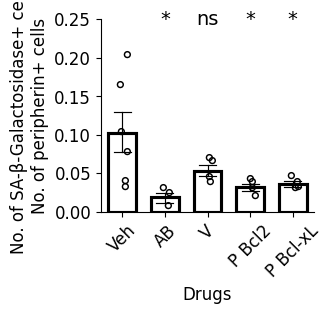

In [82]:
fig, ax = plt.subplots(figsize=(2.75,2.5))
sns.barplot(x='Conditions', y='value', data=df_treat, 
            errorbar=("ci", 68), capsize=.4, ax=ax,
            err_kws={"color": "k", "linewidth": 0.85},
            fill=False,
            color='k',
            width=0.65)
sns.stripplot(x='Conditions', y='value', data=df_treat, ax=ax, color='k', size=8, marker='$\circ$')

ax.set_ylim(0,0.25)
for i in range(1,5):
    plt.text(i, 0.25, 'ns' if i == 2 else '*', ha='center', va='center', fontsize=14)
    
ax.set_xlabel('Drugs', fontsize=12)
ax.set_ylabel('No. of SA-β-Galactosidase+ cells/\nNo. of peripherin+ cells', fontsize=12)
ax.set_xticklabels(['Veh','AB','V','P Bcl2','P Bcl-xL'], fontsize=12, rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig('/Users/pax/Library/CloudStorage/OneDrive-KarolinskaInstitutet/Manu_fig/img_treatment.pdf', bbox_inches='tight', dpi=300)